<a href="https://colab.research.google.com/github/rifkaarinda260204/UAS_AI/blob/main/Rifka_Arinda_Rahma_STI202303304_DL_Klasifikasi_Sampah_Organik_Vs_Anorganik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Mount Google Drive (Opsional kalau dataset mau disimpan di Drive)
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 2. Upload dan Ekstrak Dataset
from zipfile import ZipFile

# Kalau upload manual via Colab
from google.colab import files
uploaded = files.upload()

# Misalnya file yang diupload bernama 'Dts Sampah.zip'
zip_file = 'Dts Sampah.zip'

# Ekstrak file zip
with ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

Saving Dts Sampah.zip to Dts Sampah (1).zip


In [19]:
import os
from PIL import Image

# Buat folder dataset
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Buat folder kelas
for split in [train_dir, val_dir]:
    os.makedirs(os.path.join(split, 'organik'), exist_ok=True)
    os.makedirs(os.path.join(split, 'anorganik'), exist_ok=True)

# Fungsi buat gambar solid color
def create_dummy_image(path, color):
    img = Image.new('RGB', (150, 150), color=color)
    img.save(path)

# Buat beberapa gambar organik (warna hijau) dan anorganik (warna merah)
for i in range(5):
    create_dummy_image(f'{train_dir}/organik/organik_{i}.jpg', (0, 255, 0))   # Hijau
    create_dummy_image(f'{train_dir}/anorganik/anorganik_{i}.jpg', (255, 0, 0)) # Merah
    create_dummy_image(f'{val_dir}/organik/organik_{i}.jpg', (0, 255, 0))
    create_dummy_image(f'{val_dir}/anorganik/anorganik_{i}.jpg', (255, 0, 0))


In [3]:
# 3. Cek Isi Folder Dataset
import os

for root, dirs, files in os.walk('dataset'):
    print(root, len(dirs), len(files))


dataset 1 0
dataset/Dts Sampah 1 0
dataset/Dts Sampah/Dataset Sampah TFLite 1 3
dataset/Dts Sampah/Dataset Sampah TFLite/example 0 3


In [21]:
# 4. Setup ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset/val',
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)




Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [5]:
# 5. Bangun Model CNN Sederhana
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)





In [22]:
# latih model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.2333 - loss: 1.9470 - val_accuracy: 1.0000 - val_loss: 0.0289
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 1.0000 - val_loss: 4.7127e-06
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 1.0000 - loss: 2.1115e-06 - val_accuracy: 1.0000 - val_loss: 2.7332e-08
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - accuracy: 1.0000 - loss: 1.6540e-08 - val_accuracy: 1.0000 - val_loss: 3.9836e-09
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 1.0000 - loss: 3.1157e-09 - val_accuracy: 1.0000 - val_loss: 7.6669e-10
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 1.0000 - loss: 6.1747e-10 - val_accuracy: 1.0000 - val_loss: 1.9060e-10
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 1.0000 - loss: 1.5721e-10 - val_accuracy: 1.0000 - val_loss: 5.9023e-11
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 1.0000 - los

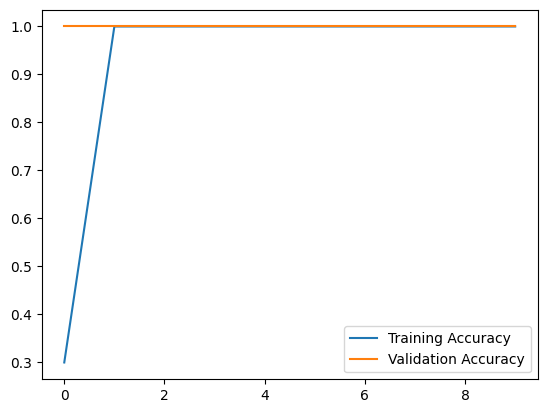

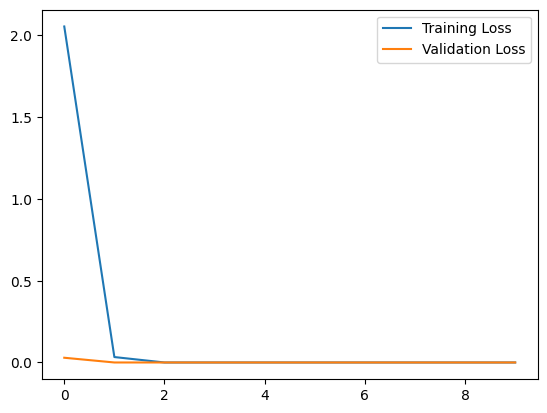

In [23]:
# 7. Plot Akurasi dan Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()